# Concise Models
Created by Christoffer Rubensson on the 2025-11-29.

This notebook will soon be filled with examples on how to create and evaluate concise models.

*To be continue.*

In [1]:
#TODO

### Initialization

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
from pathlib import Path
# App directory
project_root = Path.cwd().parent  # Adjust this if necessary
sys.path.append(str(project_root))

**Import packages**

*For import without pip*

In [50]:
import pm4py
from src.variant_extraction.utils.data_importing import load_event_log
from src.variant_extraction.utils.data_processing import group_unique_values_to_dict
from src.variant_extraction.cm_methods.cm_orchestrator import enhance_log_for_concise_model
from src.variant_extraction.cm_methods.visualization.concisemodelbuilder import build_concise_dfg

In [51]:
log = load_event_log("bpic2013_incidents.xes", "input")
log_name="log"
df = log.copy()

/Users/christofferrubensson/Documents/GITHUB/VARIANT_EXTRACTION/data/input/bpic2013_incidents.xes


parsing log, completed traces :: 100%|██████████| 7554/7554 [00:02<00:00, 3096.44it/s]


**Define columns**

In [52]:
ACT_COL = "concept:name"
CASE_COL = "case:concept:name"
TIME_COL = "time:timestamp"
RES_COL = "org:resource"
RTIME_COL = "time:relative:seconds"
NRTIMECASE_COL = "time:relative:normalized:case"
NRTIMELOG_COL = "time:relative:normalized:log"
STAGE_COL = "stage:number"
COMM_COL = 'community:number'
MULTI_ACT_COL = "concept:name:multiact"
MULTI_COMM_COL = "concept:name:communities"

### Discover model

**Enhance log**

In [53]:
# define dependency threshold
dependency_threshold=0.5

# define number of stages
num_stages = 2

# define number of representative communities (0 returns all, 1 returns 2 nodes)
num_comm_ranks=0

# define number of representative activites (0 returns all, 1 returns 1)
num_act_ranks=0

# decide if you also want to hide the most common activities
hide_common_activities=False

In [54]:
df_comm_1 = enhance_log_for_concise_model(
        df,
        ACT_COL = ACT_COL,
        CASE_COL = CASE_COL,
        TIME_COL = TIME_COL,
        RES_COL = RES_COL,
        RTIME_COL = RTIME_COL,
        NRTIMECASE_COL = NRTIMECASE_COL,
        NRTIMELOG_COL = NRTIMELOG_COL,
        STAGE_COL = STAGE_COL,
        COMM_COL = COMM_COL,
        MULTI_ACT_COL = MULTI_ACT_COL,
        MULTI_COMM_COL = MULTI_COMM_COL,
        num_stages = num_stages, 
        dependency_threshold=dependency_threshold, # thresh
        num_comm_ranks=num_comm_ranks, # communities 
        num_act_ranks=num_act_ranks, # activities
        hide_common_activities=hide_common_activities # hide common activities
        )

Message: No transition-activity were be created. No transition column.


In [55]:
df_comm_1.head(2)

,case:concept:name,concept:name,time:timestamp,time:timestamp:casestart,time:timestamp:relative,time:relative:seconds,time:relative:seconds:log,time:relative:normalized:log,time:relative:normalized:case,order:position,...,stage:number,community:number,community_rank_overall,community_rank_within,activity_rank_overall,activity_rank_within,common_activities,concept:name:rep,concept:name:multiact,concept:name:communities
0,1-364285768,Accepted,2010-03-31 16:59:42+00:00,2010-03-31 16:59:42+00:00,0 days 00:00:00,0,0.000000,0.000000,0.000000,0,...,0,0,0,0,0,0,1,Accepted,Accepted,0
2,1-364285768,Queued,2010-03-31 17:45:48+00:00,2010-03-31 16:59:42+00:00,0 days 00:46:06,2766,7.925519,0.000042,0.000042,0,...,0,0,0,0,1,1,1,Queued,Queued,0


**Discover model**

In [70]:
# discover DFG
dfg_comm_1, s_comm_1, e_comm_1 = pm4py.discover_dfg(df_comm_1, activity_key=MULTI_COMM_COL)
# discover stage-community connections
stage_comm_dict_1 = group_unique_values_to_dict(
    df_comm_1, key_col=STAGE_COL, item_col=MULTI_COMM_COL, order_by="community_rank_within")
# discover community-activity connections
comm_acts_dict_1 = group_unique_values_to_dict(
    df_comm_1, key_col=MULTI_COMM_COL, item_col=MULTI_ACT_COL)

**Visualize model**

In [71]:
# choose to hide non-representative activites in the graph
hide_hidden_activities = False

In [72]:
dot_res_1 = build_concise_dfg(
        dfg_comm_1, 
        s_comm_1, 
        e_comm_1,
        comm_acts_dict_1,
        stage_comm_dict_1,
        hide_hidden_activities=hide_hidden_activities)

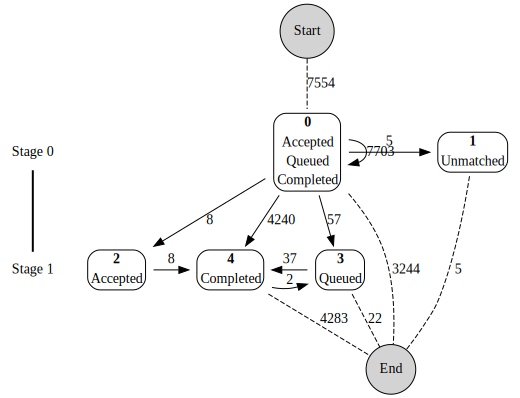

In [73]:
dot_res_1

### Evaluate 